In [1]:
#importing neccesary packages
import datetime
import numpy as npy
import pandas as pds
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_classif
from boruta import BorutaPy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC

In [2]:
Dataset= pds.read_csv(r'C:\Users\CHANDRA\Desktop\SeoulBikeData.csv',encoding = 'unicode_escape')

**DATA PREPARATION**

In [3]:
#First look of dataset
Dataset.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
#renaming Attributes
Dataset.rename({"Temperature(°C)": "Temperature",  
                      "Functioning Day":"Functioning_Day",
           "Humidity(%)": "Humidity",  
           "Wind speed (m/s)": "Wind_speed",
           "Visibility (10m)": "Visibility",
           "Dew point temperature(°C)": "Dew_point_temperature",
           "Solar Radiation (MJ/m2)": "Solar_Radiation",
           "Snowfall (cm)": "Snowfall",
           "Rainfall(mm)": "Rainfall",
           "Rented Bike Count": "Rented_Bike_Count"},  
          axis = "columns", inplace = True) 
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [6]:
#Checking the nullvalues in Dataset
Dataset.isnull().sum()


Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

In [7]:
#Checking the duplicate values in Dataset
print("Number of Duplicate values:",Dataset.duplicated().sum())

Number of Duplicate values: 0


<AxesSubplot:>

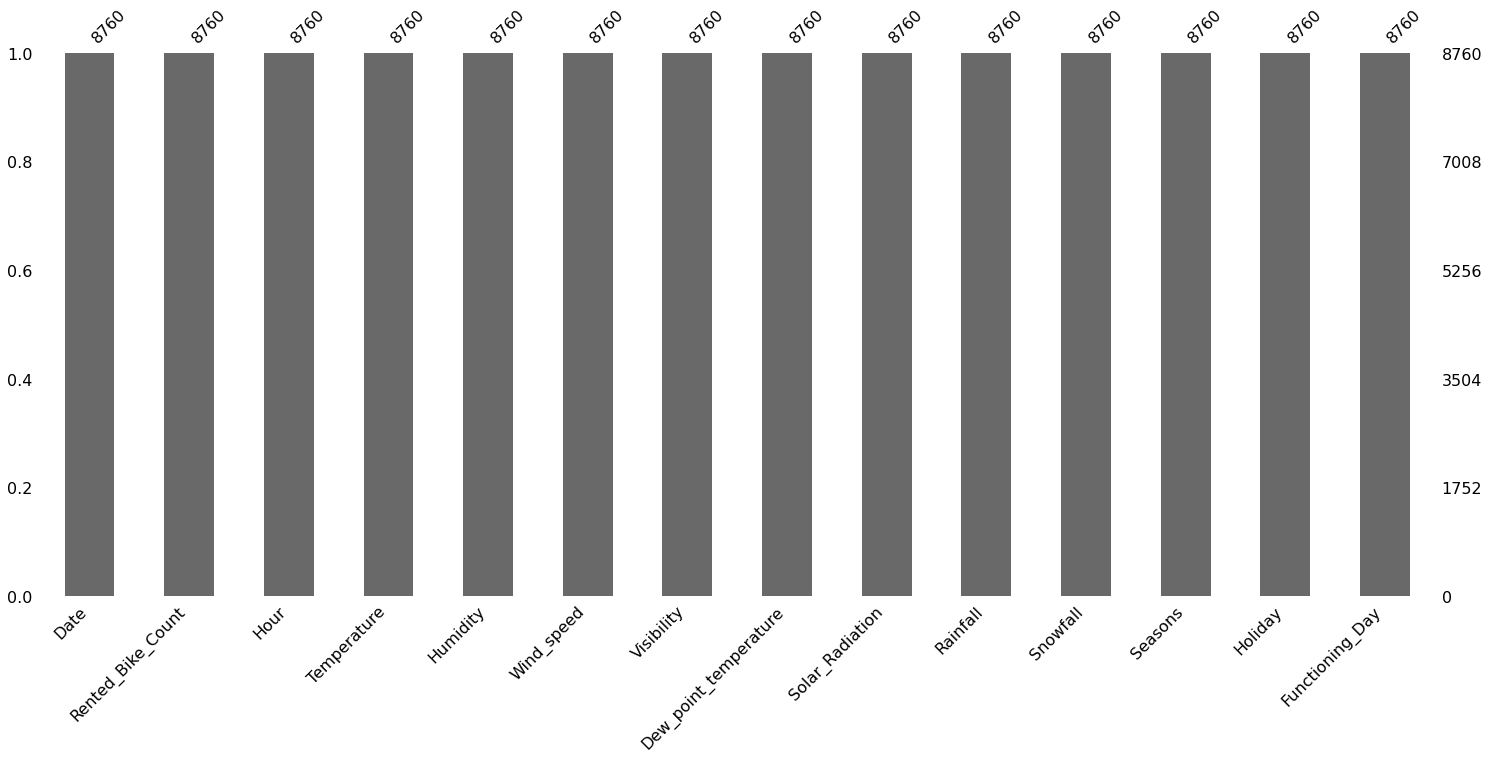

In [8]:
msno.bar(Dataset)

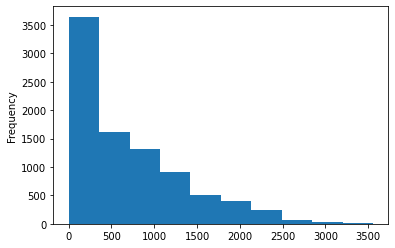

In [9]:
Dataset['Rented_Bike_Count'].plot(kind='hist');

the median is 504.5


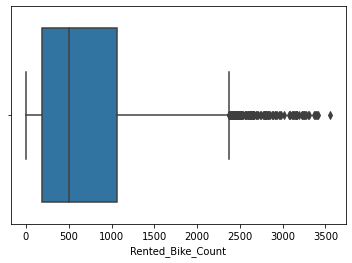

In [10]:
sns.boxplot(x=Dataset['Rented_Bike_Count'])
print ("the median is",Dataset.Rented_Bike_Count.median())

**EXPLORATORY DATA ANALYSIS(EDA)**

In [11]:
#splitting dataset into training and testing dataset
training_data , testing_data = train_test_split(Dataset,test_size=0.25,random_state=25)

print ("Number of training dataset entries:",training_data.shape[0])
print ("Number of testing dataset entries:",testing_data.shape[0])
#Splitting the Date column into date month and year separately
training_data['Day'] = pds.DatetimeIndex(training_data['Date'], dayfirst=True).day_name()
training_data['month'] = pds.DatetimeIndex(training_data['Date'], dayfirst=True).month_name()
training_data['year'] = pds.DatetimeIndex(training_data['Date'], dayfirst=True).year



Number of training dataset entries: 6570
Number of testing dataset entries: 2190


**VISUALIZING CATEGORICAL DATA**

Text(0, 0.5, 'Frequency')

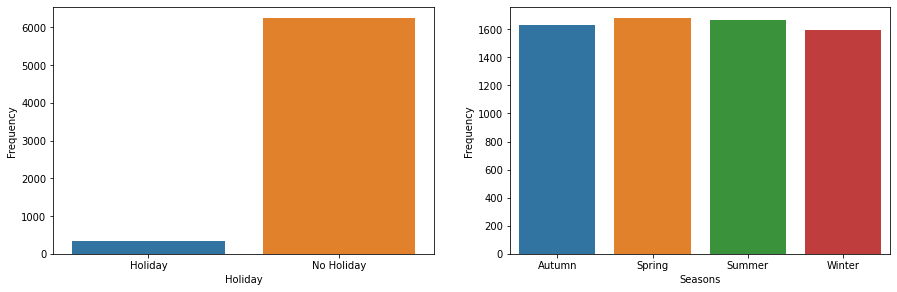

In [12]:
Holiday = pds.DataFrame(training_data.groupby('Holiday').agg({'Rented_Bike_Count':'count'}))
Season= pds.DataFrame(training_data.groupby('Seasons').agg({'Rented_Bike_Count':'count'}))
fig,size = plt.subplots(1,1,figsize=(15,10))
ax1=plt.subplot(2, 2,1)
sns.barplot(x=Holiday.index, y = Holiday['Rented_Bike_Count'])
ax1.set_ylabel("Frequency")
ax1=plt.subplot(2, 2,2)
sns.barplot(x=Season.index, y = Season['Rented_Bike_Count'])
ax1.set_ylabel("Frequency")


Text(0, 0.5, 'Rented Bike Count')

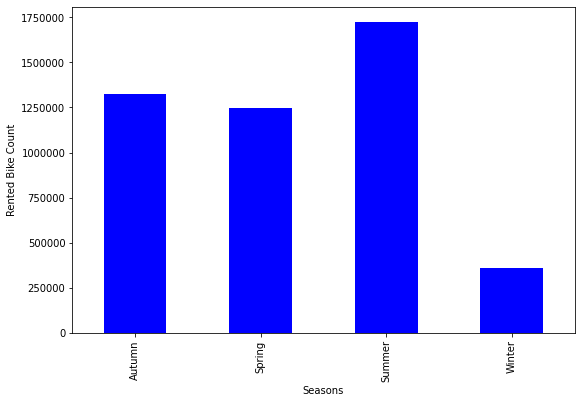

In [13]:
plt.figure(figsize=(9,6))
training_data.groupby('Seasons')['Rented_Bike_Count'].sum().plot.bar(color='blue')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Rented Bike Count')


Text(0, 0.5, 'Rented Bike Count')

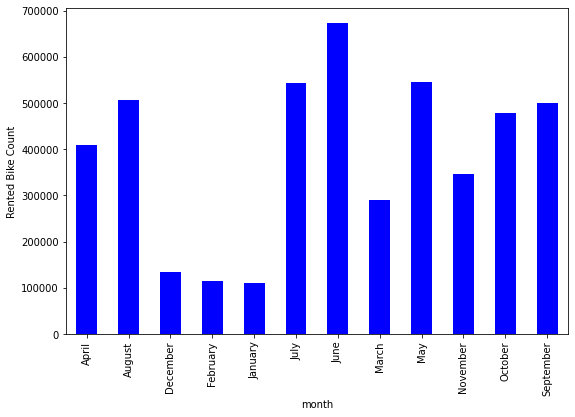

In [14]:
plt.figure(figsize=(9,6))
training_data.groupby('month')['Rented_Bike_Count'].sum().plot.bar(color='blue')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Rented Bike Count')


Text(0, 0.5, 'Rented Bike Count')

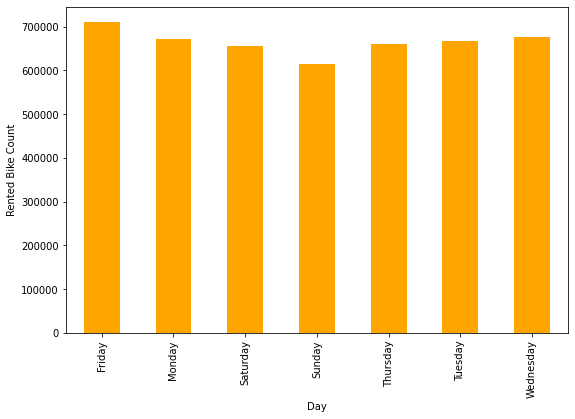

In [15]:
plt.figure(figsize=(9,6))
training_data.groupby('Day')['Rented_Bike_Count'].sum().plot.bar(color='orange')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Rented Bike Count')

Text(0, 0.5, 'Rented Bike Count')

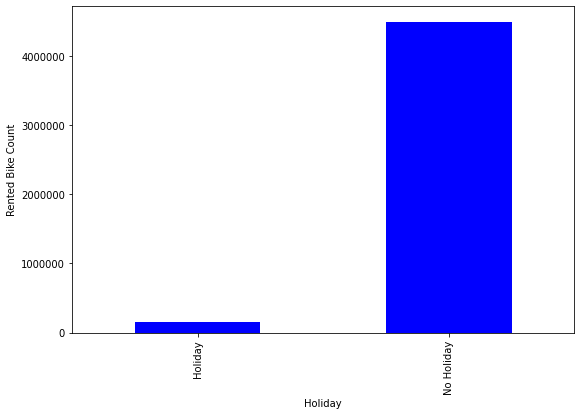

In [16]:
plt.figure(figsize=(9,6))
training_data.groupby('Holiday')['Rented_Bike_Count'].sum().plot.bar(color='blue')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Rented Bike Count')


Text(0, 0.5, 'Rented Bike Count')

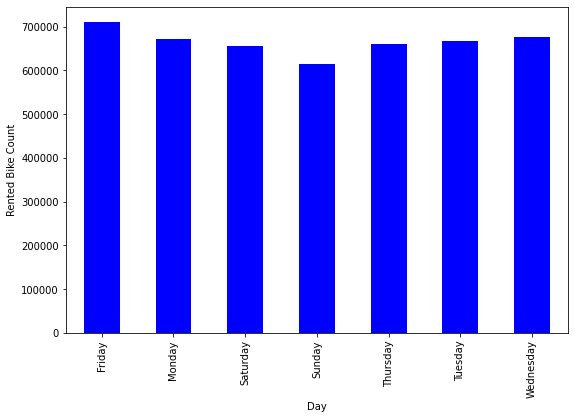

In [17]:
plt.figure(figsize=(9,6))
training_data.groupby('Day')['Rented_Bike_Count'].sum().plot.bar(color='blue')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Rented Bike Count')

**VISUALIZING NUMERICAL DATA**

Text(0, 0.5, 'Rented Bike Count')

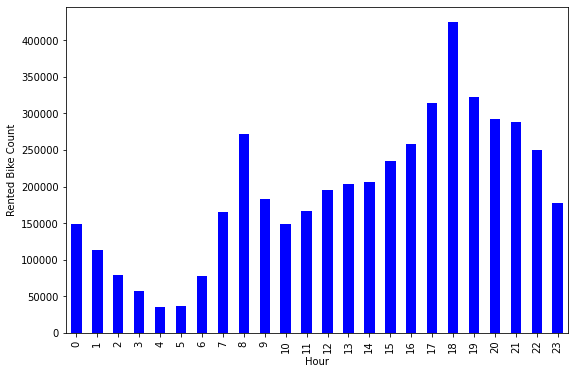

In [18]:
plt.figure(figsize=(9,6))
training_data.groupby('Hour')['Rented_Bike_Count'].sum().plot.bar(color='blue')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Rented Bike Count')

Text(0, 0.5, 'Rented Bike Count')

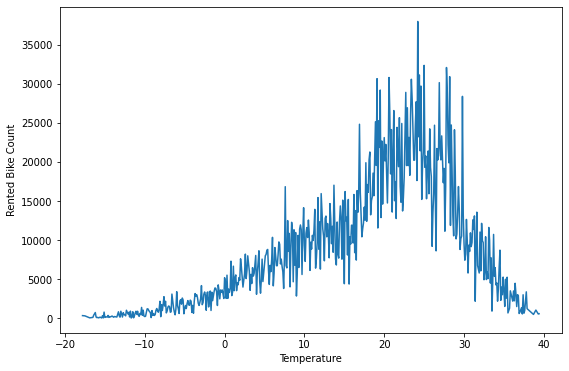

In [19]:
plt.figure(figsize=(9,6))
training_data.groupby('Temperature')['Rented_Bike_Count'].sum().plot()

plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Rented Bike Count')

Text(0, 0.5, 'Rented Bike Count')

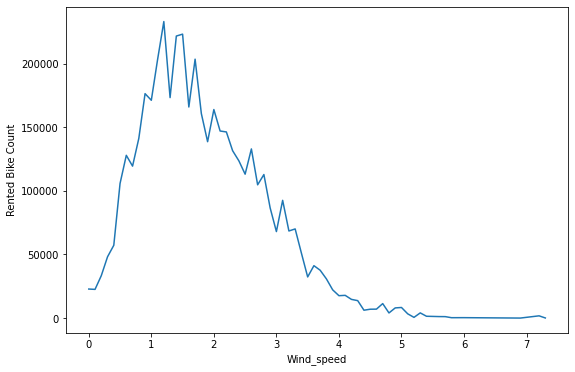

In [20]:
plt.figure(figsize=(9,6))
training_data.groupby('Wind_speed')['Rented_Bike_Count'].sum().plot()

plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Rented Bike Count')

Text(0, 0.5, 'Rented Bike Count')

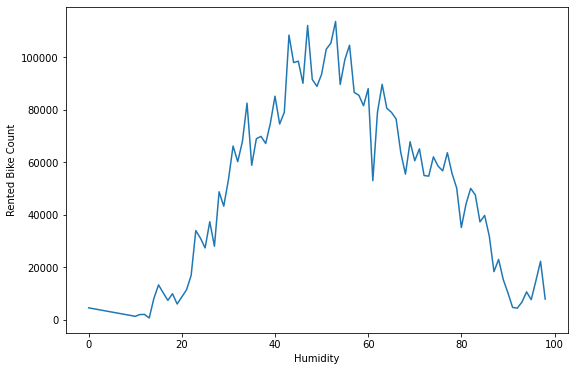

In [21]:
plt.figure(figsize=(9,6))
training_data.groupby('Humidity')['Rented_Bike_Count'].sum().plot()

plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Rented Bike Count')

Text(0, 0.5, 'Rented Bike Count')

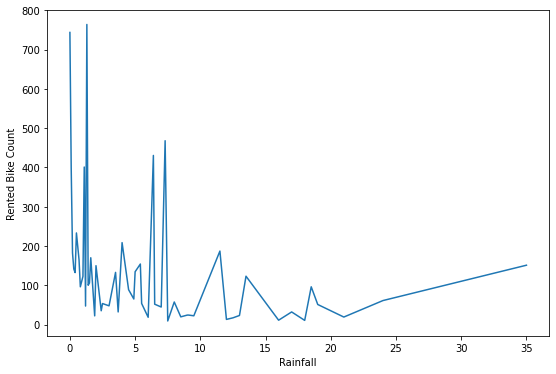

In [22]:
plt.figure(figsize=(9,6))
training_data.groupby('Rainfall')['Rented_Bike_Count'].mean().plot()

plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Rented Bike Count')

Text(0, 0.5, 'Rented Bike Count')

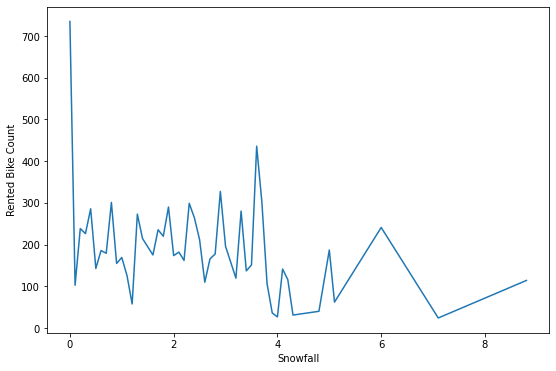

In [23]:
plt.figure(figsize=(9,6))
training_data.groupby('Snowfall')['Rented_Bike_Count'].mean ().plot()

plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Rented Bike Count')

Text(0, 0.5, 'Rented Bike Count')

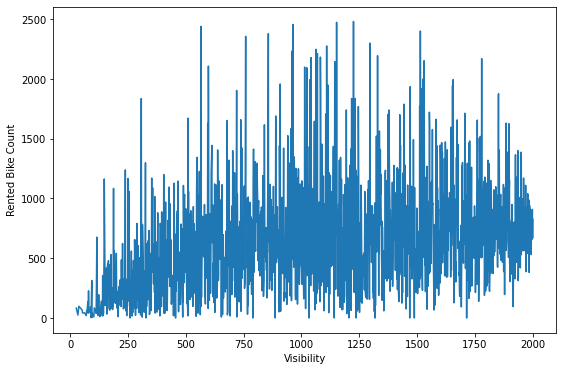

In [24]:
plt.figure(figsize=(9,6))
training_data.groupby('Visibility')['Rented_Bike_Count'].mean().plot()

plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Rented Bike Count')

Text(0, 0.5, 'Rented Bike Count')

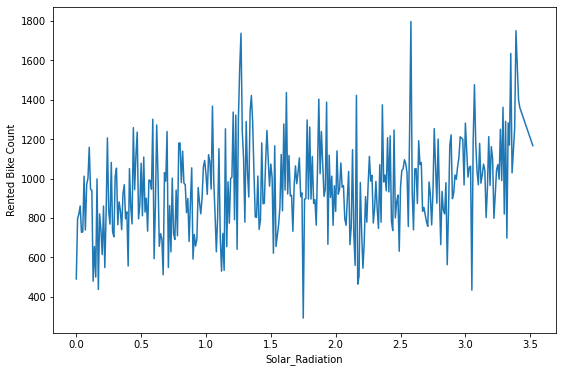

In [25]:
plt.figure(figsize=(9,6))
training_data.groupby('Solar_Radiation')['Rented_Bike_Count'].mean().plot()

plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Rented Bike Count')

**DATA PRE-PROCESSING**

In [26]:
# Transforming the Holiday variable 
Dataset['Holiday']=Dataset['Holiday'].apply(lambda x: 1 if x=='Holiday' else 0)
# Transforming the Functioning Day variable 
Dataset['Functioning_Day']=Dataset['Functioning_Day'].apply(lambda x: 1 if x=='Yes' else 0)
# Transforming the Seasons variable
from sklearn.preprocessing import OneHotEncoder
one_hot_encoded_data = pds.get_dummies(Dataset['Seasons'])
Dataset=pds.concat([Dataset,one_hot_encoded_data],axis=1)
# Take a look of dataset after coverting categorical columns
Dataset.head()


,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Autumn,Spring,Summer,Winter
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,0,0,0,1
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,0,0,0,1
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,0,0,0,1
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,0,0,0,1
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,0,0,0,1


In [27]:
Dataset.drop('Seasons',axis=1,inplace=True)


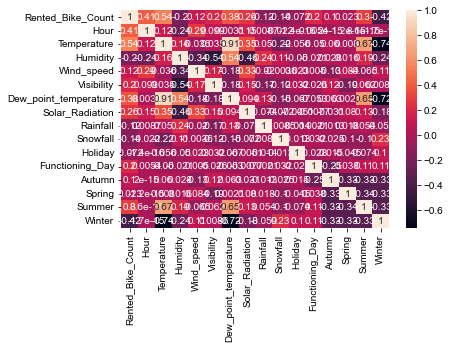

In [28]:
sns.heatmap(Dataset.corr(),annot=True)
sns.set(rc={'figure.figsize':(20,15)})

BORUTA ALGORITHM

In [34]:

newdata=Dataset.drop('Date',axis=1)


ind_col = [col for col in newdata.columns if col != 'Rented_Bike_Count']
dep_col = 'Rented_Bike_Count'

X = newdata[ind_col]
y = newdata[dep_col]
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50,random_state = 42)


In [32]:
rf_1 = RandomForestRegressor(n_jobs=-1, oob_score= True)
feat_selector = BorutaPy(rf_1, n_estimators = 'auto', max_iter= 50)
feat_selector.fit(X_train, y_train)

BorutaPy(estimator=RandomForestRegressor(n_estimators=46, n_jobs=-1,
                                         oob_score=True,
                                         random_state=RandomState(MT19937) at 0x1F677134140),
         max_iter=50, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1F677134140)

In [35]:
feature_names=npy.array(X_train.columns)
print(feat_selector.support_)

[ True  True  True False  True  True  True  True False False  True  True
 False False  True]


In [36]:
print(feat_selector.ranking_) #Rank 1 is the best
X_train.head()


[1 1 1 2 1 1 1 1 6 5 1 1 3 4 1]


,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Holiday,Functioning_Day,Autumn,Spring,Summer,Winter
2642,2,1.4,40,2.9,2000,-10.7,0.00,0.0,0.0,0,1,0,1,0,0
5001,9,20.0,96,1.6,287,19.3,0.39,0.0,0.0,0,1,0,0,1,0
2305,1,2.8,46,2.0,1709,-7.6,0.00,0.0,0.0,0,1,0,1,0,0
5325,21,25.1,86,0.3,870,22.5,0.00,0.0,0.0,0,1,0,0,1,0
4195,19,21.1,44,2.6,1512,8.3,0.41,0.0,0.0,0,1,0,1,0,0


In [37]:
feature_ranks = list(zip(feature_names, 
                         feat_selector.ranking_, 
                         feat_selector.support_))



In [38]:
for feat in feature_ranks:
    print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))

Feature: Hour                           Rank: 1,  Keep: True
Feature: Temperature                    Rank: 1,  Keep: True
Feature: Humidity                       Rank: 1,  Keep: True
Feature: Wind_speed                     Rank: 2,  Keep: False
Feature: Visibility                     Rank: 1,  Keep: True
Feature: Dew_point_temperature          Rank: 1,  Keep: True
Feature: Solar_Radiation                Rank: 1,  Keep: True
Feature: Rainfall                       Rank: 1,  Keep: True
Feature: Snowfall                       Rank: 6,  Keep: False
Feature: Holiday                        Rank: 5,  Keep: False
Feature: Functioning_Day                Rank: 1,  Keep: True
Feature: Autumn                         Rank: 1,  Keep: True
Feature: Spring                         Rank: 3,  Keep: False
Feature: Summer                         Rank: 4,  Keep: False
Feature: Winter                         Rank: 1,  Keep: True


In [39]:

estimator = RandomForestRegressor(random_state=0, n_estimators=100)
selector = RFE(estimator, n_features_to_select=8, step=1)
selector = selector.fit(X_train, y_train)

In [40]:
filter = selector.support_
ranking = selector.ranking_

print("Mask data: ", filter)
print("Ranking: ", ranking)

Mask data:  [ True  True  True False  True  True  True  True False False  True False
 False False False]
Ranking:  [1 1 1 3 1 1 1 1 8 7 1 4 5 6 2]


In [41]:
features = npy.array(X_train.columns)
print("All features:")
print(features)

print("Selected features:")
print(features[filter])

All features:
['Hour' 'Temperature' 'Humidity' 'Wind_speed' 'Visibility'
 'Dew_point_temperature' 'Solar_Radiation' 'Rainfall' 'Snowfall' 'Holiday'
 'Functioning_Day' 'Autumn' 'Spring' 'Summer' 'Winter']
Selected features:
['Hour' 'Temperature' 'Humidity' 'Visibility' 'Dew_point_temperature'
 'Solar_Radiation' 'Rainfall' 'Functioning_Day']


METHODOLOGY

LINEAR REGRESSION

In [42]:

regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred_train=regressor.predict(X_train)
y_pred=regressor.predict(X_test)

importance = regressor.coef_




In [43]:
print("R2 SCORE:",r2_score(y_test, y_pred))

R2 SCORE: 0.5348304286902545


In [44]:
MSE  = mean_squared_error(y_test, y_pred)
RMSE = npy.sqrt(MSE)
print("RMSE :" ,RMSE)

RMSE : 436.26878824706887


In [45]:
MAE  = mean_absolute_error(y_test, y_pred)
print("MAE :" , MAE)


MAE : 327.05400311493787


Feature: 0, Score: 28.96693
Feature: 1, Score: 21.85983
Feature: 2, Score: -9.08664
Feature: 3, Score: 20.00177
Feature: 4, Score: 0.01970
Feature: 5, Score: 4.90477
Feature: 6, Score: -77.71393
Feature: 7, Score: -66.93957
Feature: 8, Score: 25.95135
Feature: 9, Score: -144.60308
Feature: 10, Score: 933.60557
Feature: 11, Score: 165.48737
Feature: 12, Score: 25.83758
Feature: 13, Score: 8.07995
Feature: 14, Score: -199.40490


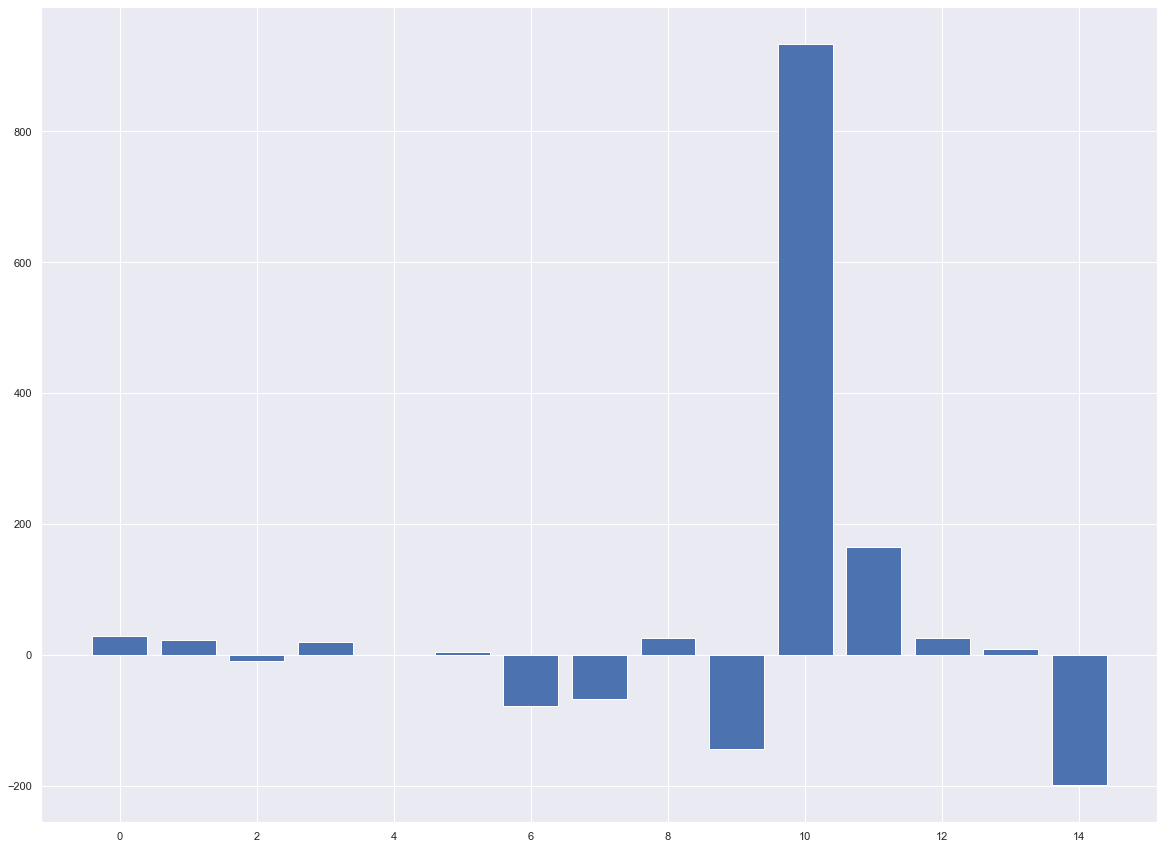

In [46]:


# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [47]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = npy.array(importance)
    feature_names = npy.array(names)

#Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pds.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
    plt.figure(figsize=(10,8))
#Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
    #plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')



GBM

In [48]:


ensemble = GradientBoostingRegressor()
ensemble.fit(X_train,y_train)
y_pred_train=ensemble.predict(X_train)
y_pred=ensemble.predict(X_test)
r2=r2_score(y_test, y_pred)
print(r2)
MSE  = mean_squared_error(y_test, y_pred)
RMSE = npy.sqrt(MSE)
print("RMSE :" ,RMSE)
MAE  = mean_absolute_error(y_test, y_pred)
print("MAE :" , MAE)


0.8270801910246988
RMSE : 265.99340452522137
MAE : 172.69406751332303


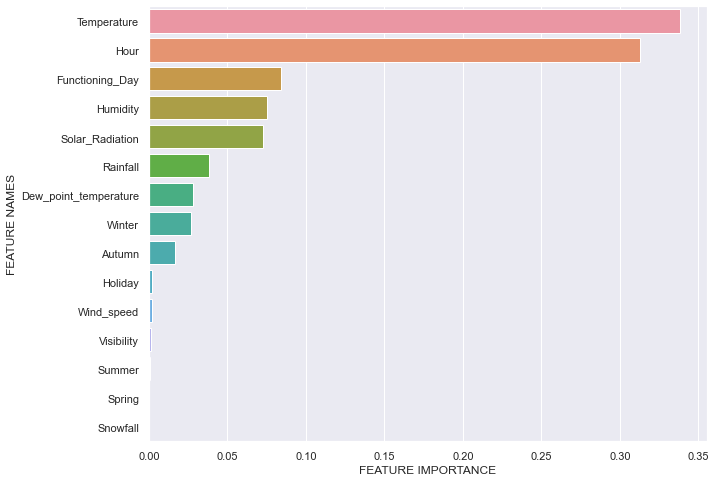

In [49]:
plot_feature_importance(ensemble.feature_importances_,X_train.columns,'GBM')

XGBOOST

In [50]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor(colsample_bytree=0.3,
                 gamma=0,             
                 learning_rate=0.02, eval_metric ='mae',
                 max_depth=2,
                 min_child_weight=2,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.9,
                 reg_lambda=0.2,
                 subsample=0.5,
                 seed=42)
model_xgb.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='mae', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.02, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=2,
             missing=nan, monotone_constraints='()', n_estimators=10000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0.9, reg_lambda=0.2, ...)

In [51]:
y_pred_train=model_xgb.predict(X_train)
y_pred=model_xgb.predict(X_test)

r2_score(y_test, y_pred)
print(r2)
MSE  = mean_squared_error(y_test, y_pred)
RMSE = npy.sqrt(MSE)
print("RMSE :" ,RMSE)
MAE  = mean_absolute_error(y_test, y_pred)
print("MAE :" , MAE)



0.8270801910246988
RMSE : 257.6743464093123
MAE : 174.44273181313216


[0.11208178 0.07455985 0.04809226 0.01368861 0.01761469 0.03332959
 0.03869156 0.04631983 0.00824993 0.01271422 0.14364588 0.02689356
 0.01477311 0.05690032 0.35244486]


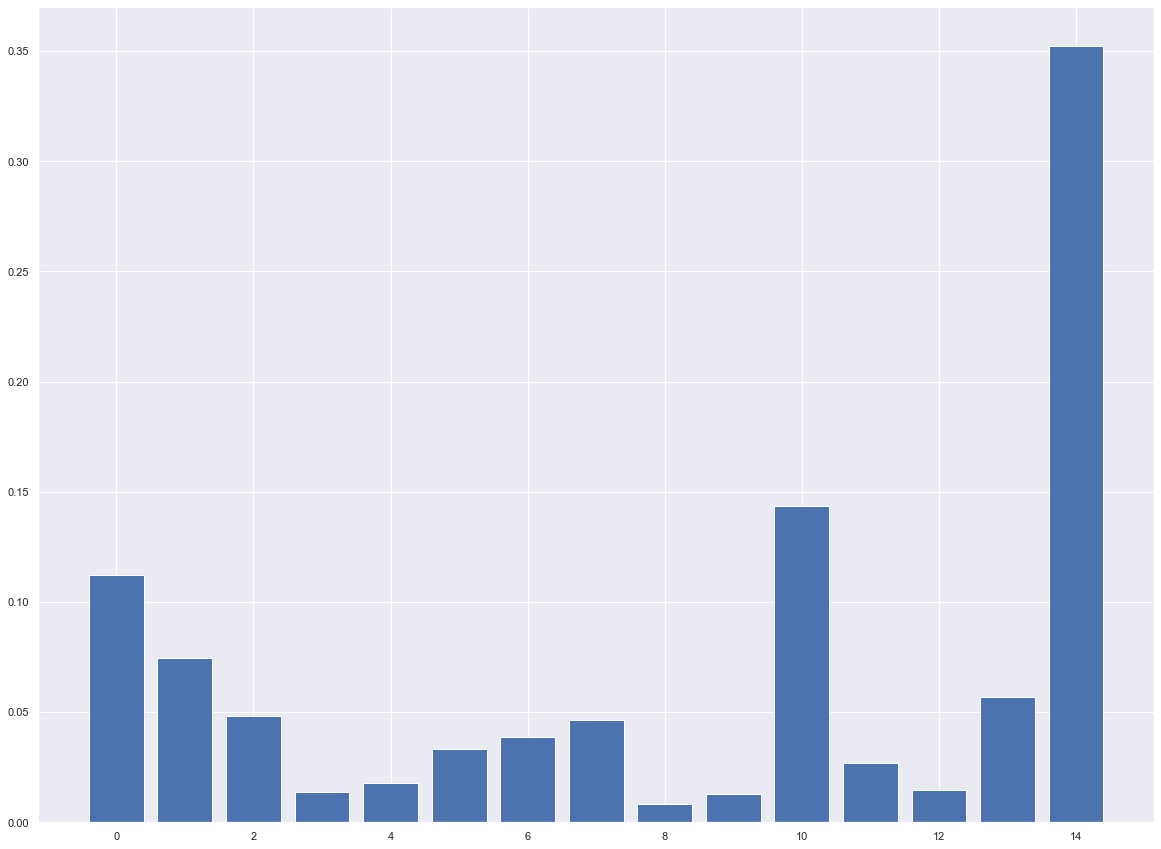

In [52]:

print(model_xgb.feature_importances_)
# plot
plt.bar(range(len(model_xgb.feature_importances_)), model_xgb.feature_importances_)
plt.show()


ADABOOST

0.6056034283719965
RMSE : 401.7122357970544
MAE : 342.04555322400495


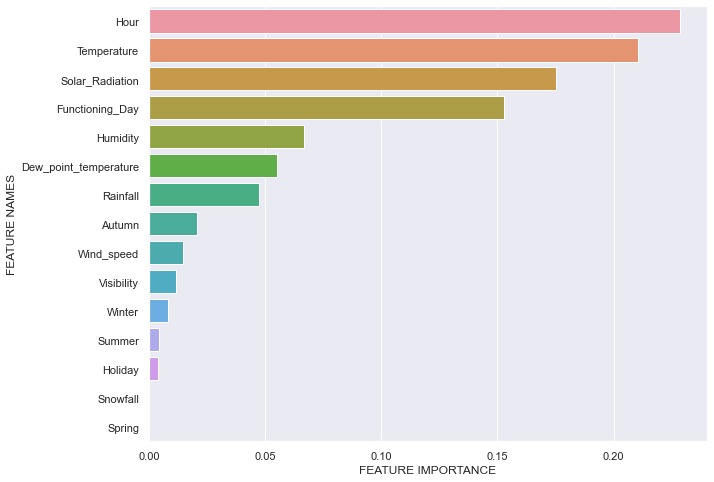

In [53]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X_train,y_train)
y_new=model.predict(X_train)
y_new2=model.predict(X_test)
r2=r2_score(y_test, y_new2)
print(r2)
MSE  = mean_squared_error(y_test, y_new2)
RMSE = npy.sqrt(MSE)
print("RMSE :" ,RMSE)
MAE  = mean_absolute_error(y_test, y_new2)
print("MAE :" , MAE)
plot_feature_importance(model.feature_importances_,X_train.columns,'ADABOOST')

SVM

In [54]:
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf')
regressor.fit(X,y)
#5 Predicting a new result
y_pred_train=model_xgb.predict(X_train)
y_pred=model_xgb.predict(X_test)

r2_score(y_test, y_pred)
print(r2)
MSE  = mean_squared_error(y_test, y_pred)
RMSE = npy.sqrt(MSE)
print("RMSE :" ,RMSE)
MAE  = mean_absolute_error(y_test, y_pred)
print("MAE :" , MAE)


0.6056034283719965
RMSE : 257.6743464093123
MAE : 174.44273181313216


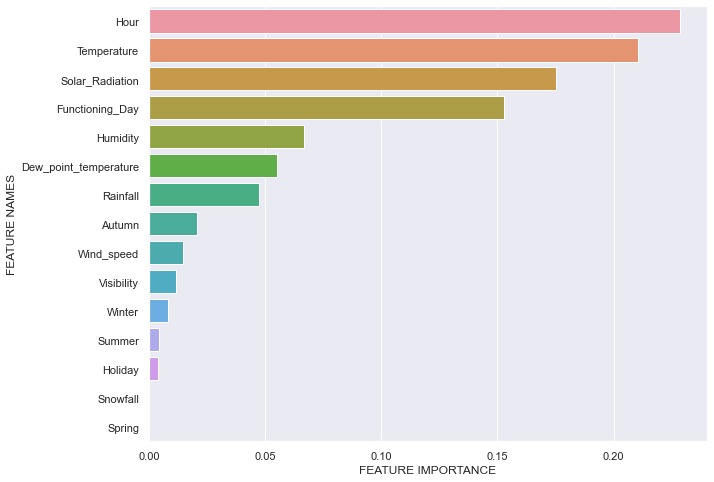

In [55]:
plot_feature_importance(model.feature_importances_,X_train.columns,'RANDOM FOREST')

GBM - DROP (TEMPERATURE)

0.7994855590079362
RMSE : 286.43185957498065
MAE : 189.11204463780234


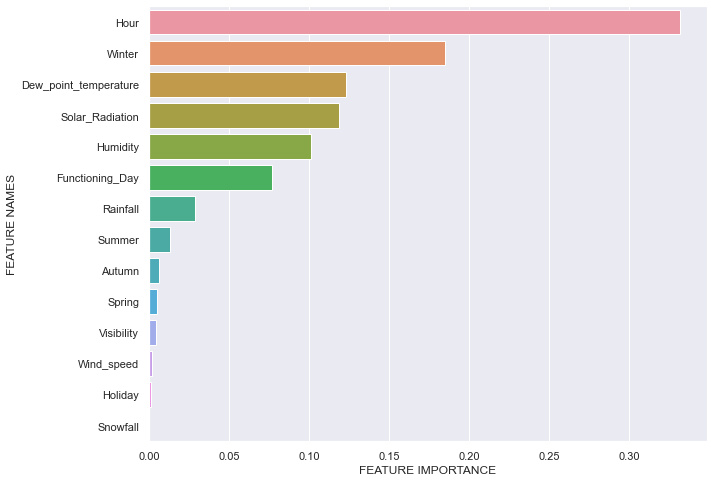

In [56]:
new_train=X_train.drop('Temperature',axis=1)
new_test=X_test.drop('Temperature',axis=1)
ensemble = GradientBoostingRegressor()
ensemble.fit(new_train,y_train)
y_pred_train=ensemble.predict(new_train)
y_pred=ensemble.predict(new_test)
r2=r2_score(y_test, y_pred)
print(r2)
MSE  = mean_squared_error(y_test, y_pred)
RMSE = npy.sqrt(MSE)
print("RMSE :" ,RMSE)
MAE  = mean_absolute_error(y_test, y_pred)
print("MAE :" , MAE)
plot_feature_importance(ensemble.feature_importances_,new_train.columns,'GBM')


GBM -DROP(WEATHER)

0.7358147005080088
RMSE : 328.77805241191356
MAE : 206.23990334488383


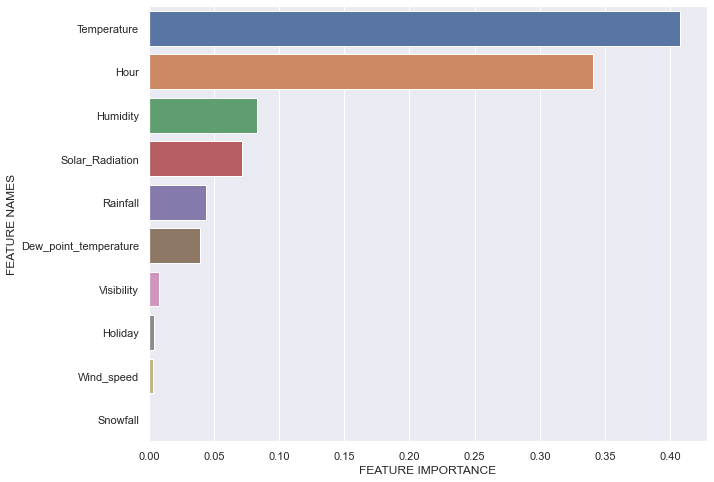

In [57]:

new_train=X_train.drop(['Summer','Winter','Autumn','Spring','Functioning_Day'],axis=1)
new_test=X_test.drop(['Summer','Winter','Autumn','Spring','Functioning_Day'],axis=1)
ensemble = GradientBoostingRegressor()
ensemble.fit(new_train,y_train)
y_pred_train=ensemble.predict(new_train)
y_pred=ensemble.predict(new_test)
r2=r2_score(y_test, y_pred)
print(r2)
MSE  = mean_squared_error(y_test, y_pred)
RMSE = npy.sqrt(MSE)
print("RMSE :" ,RMSE)
MAE  = mean_absolute_error(y_test, y_pred)
print("MAE :" , MAE)
plot_feature_importance(ensemble.feature_importances_,new_train.columns,'GBM')



GBM-DROP(SNOWFALL)

0.8282063567877379
RMSE : 265.12582902289006
MAE : 172.2383561113168


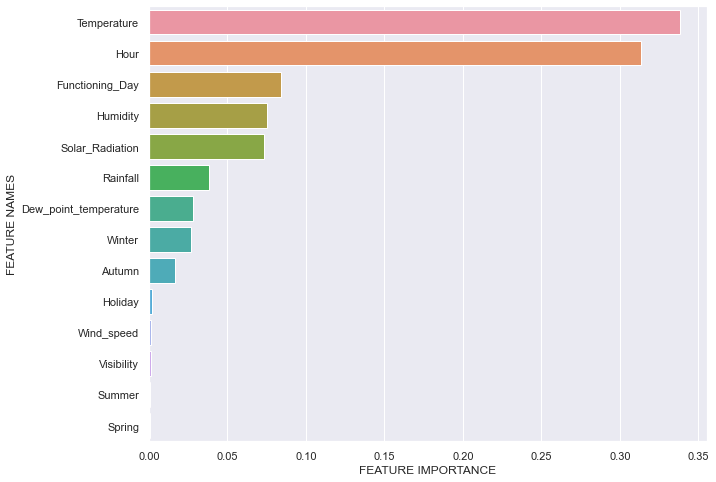

In [58]:
new_train=X_train.drop('Snowfall',axis=1)
new_test=X_test.drop('Snowfall',axis=1)
ensemble = GradientBoostingRegressor()
ensemble.fit(new_train,y_train)
y_pred_train=ensemble.predict(new_train)
y_pred=ensemble.predict(new_test)
r2=r2_score(y_test, y_pred)
print(r2)
MSE  = mean_squared_error(y_test, y_pred)
RMSE = npy.sqrt(MSE)
print("RMSE :" ,RMSE)
MAE  = mean_absolute_error(y_test, y_pred)
print("MAE :" , MAE)
plot_feature_importance(ensemble.feature_importances_,new_train.columns,'GBM')



Visibility-DROP

0.8284489598574539
RMSE : 264.9385605571989
MAE : 171.5896488617383


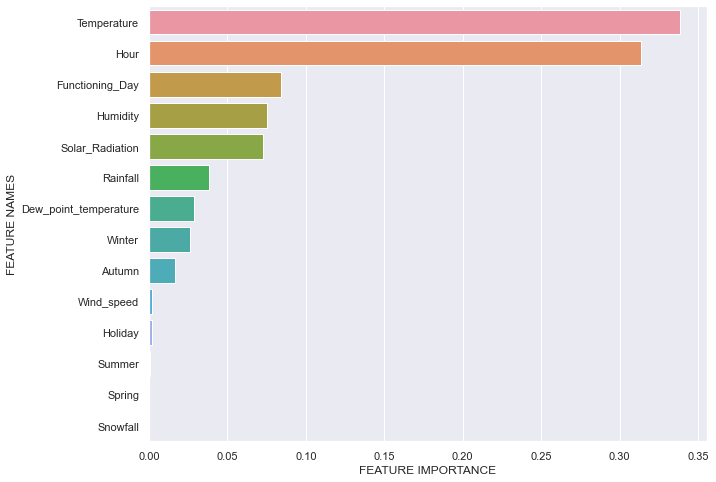

In [59]:
new_train=X_train.drop('Visibility',axis=1)
new_test=X_test.drop('Visibility',axis=1)
ensemble = GradientBoostingRegressor()
ensemble.fit(new_train,y_train)
y_pred_train=ensemble.predict(new_train)
y_pred=ensemble.predict(new_test)
r2=r2_score(y_test, y_pred)
print(r2)
MSE  = mean_squared_error(y_test, y_pred)
RMSE = npy.sqrt(MSE)
print("RMSE :" ,RMSE)
MAE  = mean_absolute_error(y_test, y_pred)
print("MAE :" , MAE)
plot_feature_importance(ensemble.feature_importances_,new_train.columns,'GBM')

DROP - WINDSPEED

0.827720853750179
RMSE : 265.5001984648767
MAE : 172.15618695535605


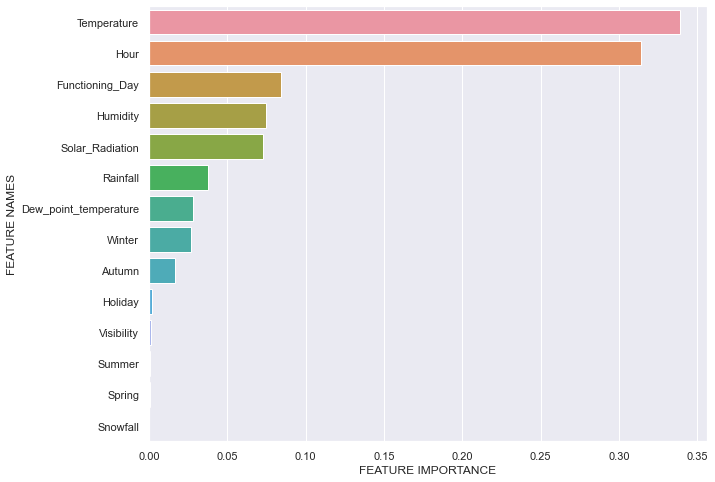

In [60]:
new_train=X_train.drop('Wind_speed',axis=1)
new_test=X_test.drop('Wind_speed',axis=1)
ensemble = GradientBoostingRegressor()
ensemble.fit(new_train,y_train)
y_pred_train=ensemble.predict(new_train)
y_pred=ensemble.predict(new_test)
r2=r2_score(y_test, y_pred)
print(r2)
MSE  = mean_squared_error(y_test, y_pred)
RMSE = npy.sqrt(MSE)
print("RMSE :" ,RMSE)
MAE  = mean_absolute_error(y_test, y_pred)
print("MAE :" , MAE)
plot_feature_importance(ensemble.feature_importances_,new_train.columns,'GBM')

DROP - SNOWFALL AND VISIBILITY

0.8274012152839241
RMSE : 265.74638249632744
MAE : 171.737991413851


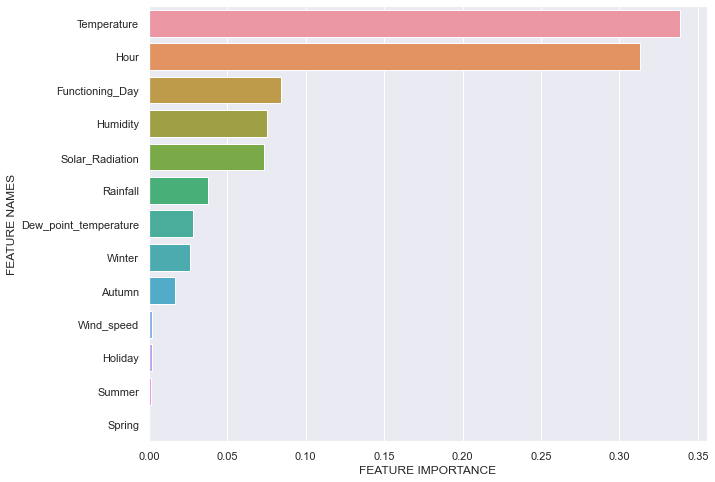

In [61]:
new_train=X_train.drop(['Snowfall','Visibility'],axis=1)
new_test=X_test.drop(['Snowfall','Visibility'],axis=1)
ensemble = GradientBoostingRegressor()
ensemble.fit(new_train,y_train)
y_pred_train=ensemble.predict(new_train)
y_pred=ensemble.predict(new_test)
r2=r2_score(y_test, y_pred)
print(r2)
MSE  = mean_squared_error(y_test, y_pred)
RMSE = npy.sqrt(MSE)
print("RMSE :" ,RMSE)
MAE  = mean_absolute_error(y_test, y_pred)
print("MAE :" , MAE)
plot_feature_importance(ensemble.feature_importances_,new_train.columns,'GBM')